In [42]:
import numpy as np
import matplotlib.pyplot as py
import scipy.special
%matplotlib inline

In [43]:
# 신경망은 적어도 다음 세가지 기능을 가져야 한다.
# 초기화: 입력, 은닉, 출력 노드의 수, 학습률, 가중치 행렬, 활성화함수 설정
# 학습: 학습 데이터들을 학습학 이에 따라 가중치를 업데이트
# 질의: 입력을 받아 연산한 후 출력 노드에서 답을 전달

class NeuralNetwork:
    def __init__(self, inputNodes, hiddenNodes, outputNodes, learningRate):
        self.inputNodes=inputNodes
        self.hiddenNodes=hiddenNodes
        self.outputNodes=outputNodes
        
        self.learningRate=learningRate
        
        #가중치 범위는 -1~1사이가 되어야 하며
        #가중치는 0을 중심으로 하며 1/root(들어오는 연결노드의 개수)의 표준편차를 가지는 정규분포를 이용해 초기화 한다.
        self.wih=np.random.normal(loc=0.0, scale=pow(self.hiddenNodes, -0.5), size=(self.hiddenNodes, self.inputNodes))
        self.who=np.random.normal(loc=0.0, scale=pow(self.outputNodes, -0.5), size=(self.outputNodes, self.hiddenNodes))
        
        #활성화 함수로 sigmoid함수 사용
        self.activationFunction = lambda x:scipy.special.expit(x)
        
        pass
    
    # 학습의 단계
    # 1.출력값 계산(query함수와 유사)
    # 2.가중치가 어떻게 업데이트 되어야 하는지 알려주기 위해 오차를 역전파하는 단계
    def train(self, inputList, targetList):
        inputs=np.array(inputList, ndmin=2).T
        targets=np.array(targetList, ndmin=2).T

        hiddenInputs=np.dot(self.wih, inputs)
        hiddenOutputs=self.activationFunction(hiddenInputs)
        
        finalInputs=np.dot(self.who, hiddenOutputs)
        finalOutputs=self.activationFunction(finalInputs)
        
        
        # 오차는 실제값-계산값
        # ERROR hidden = WT hidden_output*ERROR output
        outputErrors=targets-finalOutputs   
        hiddenErrors=np.dot(self.who.T, outputErrors)
        
        # 은닉계층과 출력계층간의 가중치 업데이트
        # sigmoid(x) 미분하면 sigmoid(x)*(1-sigmoid(x))
        self.who+=self.learningRate*np.dot((outputErrors*finalOutputs*(1.0-finalOutputs)), np.transpose(hiddenOutputs))
        
        # 입력계층과 은닉계층간의 가중치 업데이트
        self.wih+=self.learningRate*np.dot((hiddenErrors*hiddenOutputs*(1.0-hiddenOutputs)), np.transpose(inputs))

        pass
    
    def query(self, inputList):
        #입력 리스트를 2차원 행렬로 변환
        inputs=np.array(inputList, ndmin=2).T
        
        # X hidden = W input_hidden * I
        # O hidden = sigmoid(X hidden)
        hiddenInputs=np.dot(self.wih, inputs)
        hiddenOutputs=self.activationFunction(hiddenInputs)
        
        finalInputs=np.dot(self.who, hiddenOutputs)
        finalOutputs=self.activationFunction(finalInputs)
        
        return finalOutputs

In [44]:
#입력, 은닉, 출력 노드의 수
inputNodes=28*28
# 은닉노드는 입력노드의 수보다는 작은 값을 선택함으로써 신경망이 주요 특징을 찾아냄
# 은닉노드수를 몇개로 해야 할지 결정하는 완벽한 방법론은 없다.
#최적의 설정을 찾을때까지 실험을 반복해야 한다.
hiddenNodes=150
outputNodes=10

learningRate=0.3

n=NeuralNetwork(inputNodes, hiddenNodes, outputNodes, learningRate)

In [45]:
#학습데이터를 리스트로 불러오기
trainingDataFile=open("data/mnistTraining.csv", "r")
trainingDataList=trainingDataFile.readlines()
trainingDataFile.close()

In [46]:
#학습 데이터 모음 내의 모든 레코드 탐색
for record in trainingDataList:
    allValues=record.split(',')
    inputs =np.asfarray(allValues[1:])/255.0*0.99+0.01
    targets=np.zeros(outputNodes)+0.01
    
    # int(allValues[0])는 이 레코드에 대한 결과 값
    targets[int(allValues[0])]=0.99
    n.train(inputs, targets)
    pass



In [47]:
testDataFile=open("data/mnistTest.csv", 'r')
testDataList=testDataFile.readlines()
testDataFile.close()

In [48]:
allValues=testDataList[0].split(',')
allValues[0]

'7'

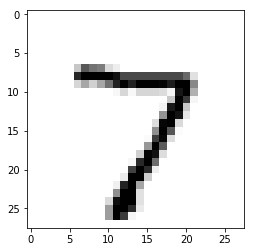

In [49]:
imageArray=np.asfarray(allValues[1:]).reshape(28,28)
py.imshow(imageArray, cmap="Greys", interpolation='None')

In [50]:
n.query((np.asfarray(allValues[1:])/255.0*0.99)+0.01)

array([[ 0.03604278],
       [ 0.00724451],
       [ 0.00854551],
       [ 0.03388031],
       [ 0.01767656],
       [ 0.01275198],
       [ 0.00362023],
       [ 0.93673596],
       [ 0.02750602],
       [ 0.00834103]])

In [51]:
# 신경망 테스트
scoreCard=[]

for record in testDataList:
    allValues=record.split(',')
    correctLabel=int(allValues[0])
    print(correctLabel, "correctLabel")
    
    #입력값의 범위와 값 조정
    inputs=(np.asfarray(allValues[1:])/255.0*0.99)+0.01
    outputs=n.query(inputs)
    label=np.argmax(outputs)
    print(label, "network's answer")
    
    #정답 또는 오답을 리스트에 추가
    if(label==correctLabel):
        #정답인 경우 성적표에 1을 더함
        scoreCard.append(1)
    else:
        #정답이 아닌 경우 성적표에 0을 더함
        scoreCard.append(0)
        pass
    pass
        

7 correctLabel
7 network's answer
2 correctLabel
6 network's answer
1 correctLabel
1 network's answer
0 correctLabel
0 network's answer
4 correctLabel
4 network's answer
1 correctLabel
1 network's answer
4 correctLabel
7 network's answer
9 correctLabel
3 network's answer
5 correctLabel
4 network's answer
9 correctLabel
7 network's answer


In [52]:
scoreCardArr=np.asarray(scoreCard)
print("performance=", scoreCardArr.sum()/scoreCardArr.size)

performance= 0.5


In [53]:
scoreCard

[1, 0, 1, 1, 1, 1, 0, 0, 0, 0]